In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import glob
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input,Conv2D, Dense, Flatten ,Dropout ,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = '/content/drive/My Drive/dataset_16'
path_No = data_dir+'/notumor/*'
path_meningioma = data_dir+'/meningioma/*'
path_glioma = data_dir+'/glioma/*'
path_pituitary = data_dir+'/pituitary/*'

tumor_meningioma = []
tumor_glioma = []
tumor_pituitary = []
no_tumor = []
random_state = 42

# Process meningioma images
for file in glob.iglob(path_meningioma):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        tumor_meningioma.append((img, 1))
    else:
        print(f"Failed to read {file}")

# Process glioma images
for file in glob.iglob(path_glioma):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        tumor_glioma.append((img, 2))
    else:
        print(f"Failed to read {file}")


# Process pituitary images
for file in glob.iglob(path_pituitary):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        tumor_pituitary.append((img, 3))
    else:
        print(f"Failed to read {file}")


# Process no tumor images
for file in glob.iglob(path_No):
    img = cv2.imread(file)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        no_tumor.append((img, 0))
    else:
        print(f"Failed to read {file}")

# Concatenate the four lists and shuffle the data
all_data = tumor_meningioma + tumor_glioma + tumor_pituitary + no_tumor
# np.random.shuffle(all_data)

# Splitting data and labels
data = np.array([item[0] for item in all_data])
labels = np.array([item[1] for item in all_data])

# One-hot encode the labels
labels = tf.keras.utils.to_categorical(labels, num_classes=4)

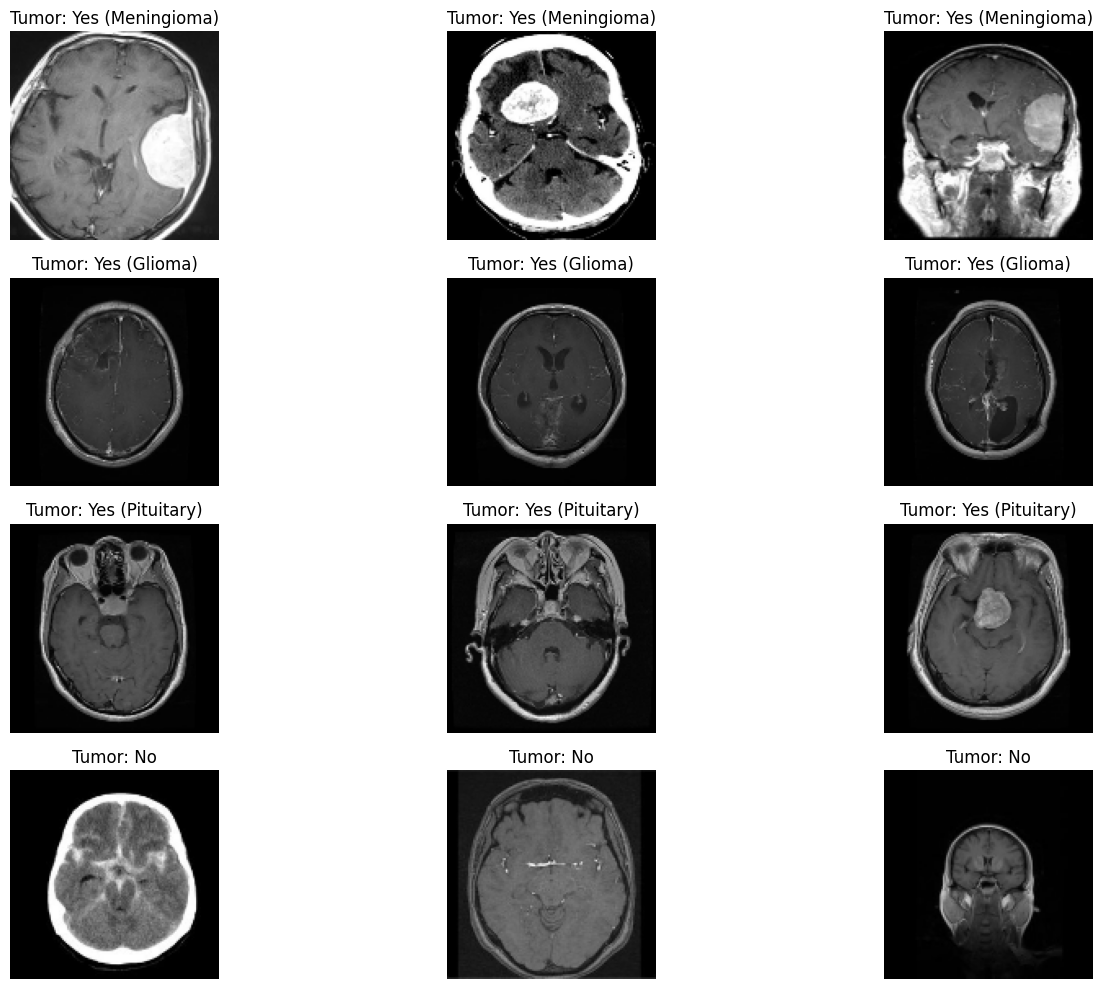

In [ ]:
plt.figure(figsize=(15, 10))

# Show tumor images labeled 'yes' for meningioma
for i in range(3):
    plt.subplot(4, 3, i+1)
    plt.imshow(tumor_meningioma[i][0])
    plt.title("Tumor: Yes (Meningioma)")
    plt.axis('off')

# Show tumor images labeled 'yes' for glioma
for i in range(3):
    plt.subplot(4, 3, i+4)
    plt.imshow(tumor_glioma[i][0])
    plt.title("Tumor: Yes (Glioma)")
    plt.axis('off')

# Show tumor images labeled 'yes' for pituitary
for i in range(3):
    plt.subplot(4, 3, i+7)
    plt.imshow(tumor_pituitary[i][0])
    plt.title("Tumor: Yes (Pituitary)")
    plt.axis('off')

# Show images without tumor labeled 'no'
for i in range(3):
    plt.subplot(4, 3, i+10)
    plt.imshow(no_tumor[i][0])
    plt.title("Tumor: No")
    plt.axis('off')

plt.tight_layout()
plt.show()

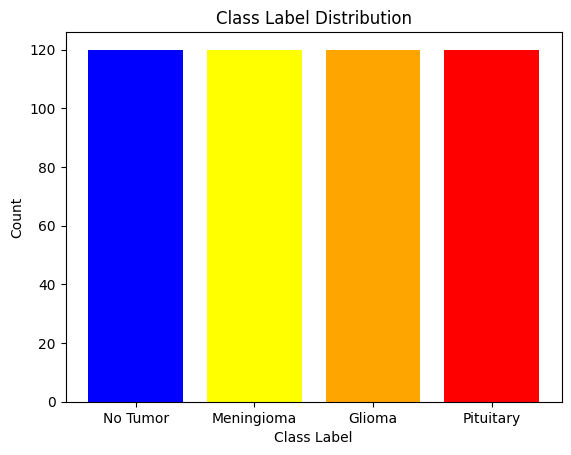

In [4]:
# Counting occurrences of each class label
labels_int = np.argmax(labels, axis=1)

# Counting occurrences of each class label
unique_labels, label_counts = np.unique(labels_int, return_counts=True)

plt.bar(unique_labels, label_counts, color=['blue', 'yellow', 'orange', 'red'])
plt.xticks(unique_labels, ['No Tumor', 'Meningioma', 'Glioma', 'Pituitary'])
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Label Distribution')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [ ]:
# Assuming x_train and x_test are your image datasets
# Normalize the pixel values to the range [0, 1]
x_train= x_train /255.0
x_test = x_test / 255.0

In [ ]:
print("Minimum value of scaled data:", x_train.min())
print("Maximum value of scaled data:",  x_train.max())

Minimum value of scaled data: 0.0
Maximum value of scaled data: 1.0


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 output units for 4 categories
])

# model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Storage of the model in an auxiliary way in case problems occur in training
aux_model = model

In [ ]:
# Define the callbacks function
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\n An acceptable level has been reached, training is cancelled")
            self.model.stop_training = True

back = myCallback()

In [ ]:
history = aux_model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[back])

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.3258 - loss: 1.3782 - val_accuracy: 0.3971 - val_loss: 1.2095
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4766 - loss: 1.1434 - val_accuracy: 0.6176 - val_loss: 1.0069
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5559 - loss: 1.0389 - val_accuracy: 0.4706 - val_loss: 1.0991
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5399 - loss: 1.0031 - val_accuracy: 0.6471 - val_loss: 0.8870
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.6959 - loss: 0.8256 - val_accuracy: 0.6618 - val_loss: 0.7968
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6806 - loss: 0.7456 - val_accuracy: 0.6912 - val_loss: 0.7707
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7678 - loss: 0.5322 - val_accuracy: 0.7059 - val_loss: 0.8402
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8244 - loss: 0.4986 - val_accuracy: 0.7941 - val_loss:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Assuming your model has been trained already
# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert predictions and true labels from one-hot encoded form to integer labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Define class names
class_names = ['No Tumor', 'Meningioma', 'Glioma', 'Pituitary']

# Print classification report
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=class_names))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Classification Report:
               precision    recall  f1-score   support

    No Tumor       0.74      0.93      0.82        42
  Meningioma       0.70      0.50      0.58        46
      Glioma       0.73      0.66      0.69        29
   Pituitary       0.84      1.00      0.92        27

    accuracy                           0.75       144
   macro avg       0.75      0.77      0.75       144
weighted avg       0.74      0.75      0.74       144



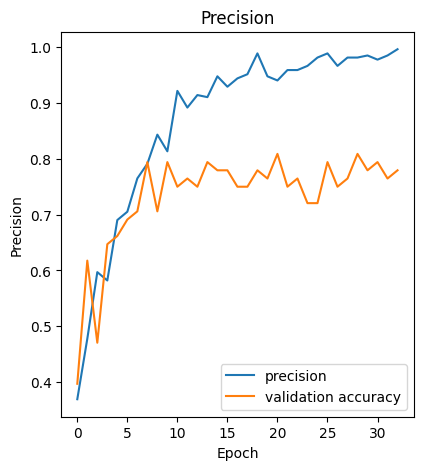

In [ ]:
# Graph accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="precision")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision")
plt.show()

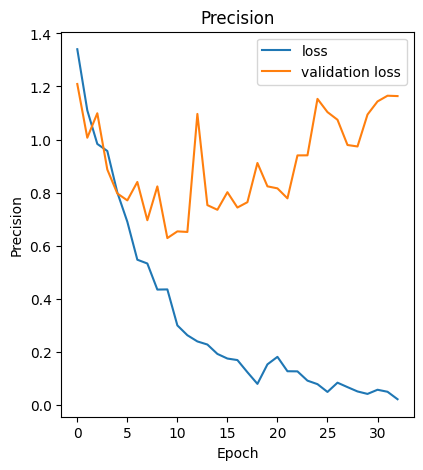

In [ ]:
# Model loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision")
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss in the test:", test_loss)
print("Test Accuracy:", test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7561 - loss: 2.0053
Loss in the test: 2.0022382736206055
Test Accuracy: 0.75


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


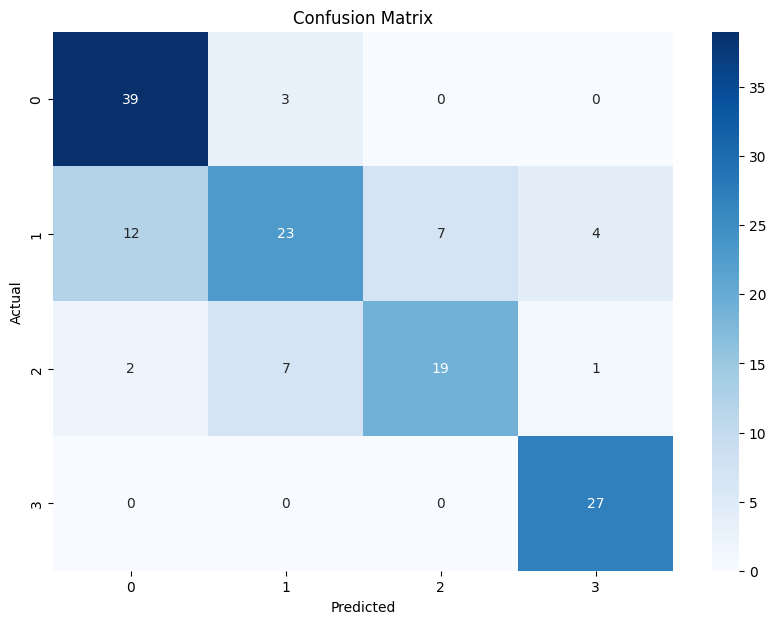

In [ ]:
# Predict the probabilities for the test set
y_prob = model.predict(x_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_prob, axis=1)

# Convert y_test to class labels if they are one-hot encoded
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted Class: No Tumor
Actual Class: No Tumor
The prediction is correct!


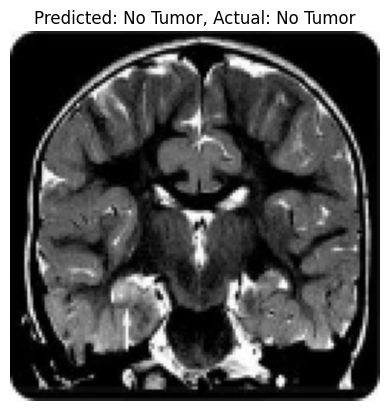

In [ ]:
import random

# Choose a random image and its label from the dataset
random_index = random.randint(0, len(all_data) - 1)
random_image, actual_label = all_data[random_index]

# Preprocess the selected image
random_image_processed = random_image / 255.0  # normalize the image
random_image_processed = np.expand_dims(random_image_processed, axis=0)  # add batch dimension

# Predict using the trained model
prediction = model.predict(random_image_processed)
predicted_class = np.argmax(prediction, axis=1)[0]

# Define class names
class_names = ['No Tumor', 'Meningioma', 'Glioma', 'Pituitary']

# Print the predicted result
print(f"Predicted Class: {class_names[predicted_class]}")

# Print the actual result
print(f"Actual Class: {class_names[actual_label]}")

# Check if the prediction is correct
if predicted_class == actual_label:
    print("The prediction is correct!")
else:
    print("The prediction is incorrect.")

# Display the image
plt.imshow(random_image)
plt.title(f"Predicted: {class_names[predicted_class]}, Actual: {class_names[actual_label]}")
plt.axis('off')  # Hide axes
plt.show()